Iteração 1/30, Melhor Valor: 12.654803552915816
Iteração 2/30, Melhor Valor: 2.7718476259823257
Iteração 3/30, Melhor Valor: 0.6006294471573199
Iteração 4/30, Melhor Valor: 0.38019325139312027
Iteração 5/30, Melhor Valor: 0.36594590910593067
Iteração 6/30, Melhor Valor: 0.23443455758736265
Iteração 7/30, Melhor Valor: 0.23443455758736265
Iteração 8/30, Melhor Valor: 0.23443455758736265
Iteração 9/30, Melhor Valor: 0.23443455758736265
Iteração 10/30, Melhor Valor: 0.23443455758736265
Iteração 11/30, Melhor Valor: 0.23443455758736265
Iteração 12/30, Melhor Valor: 0.23443455758736265
Iteração 13/30, Melhor Valor: 0.23443455758736265
Iteração 14/30, Melhor Valor: 0.15364745701088822
Iteração 15/30, Melhor Valor: 0.15364745701088822
Iteração 16/30, Melhor Valor: 0.15364745701088822
Iteração 17/30, Melhor Valor: 0.15364745701088822
Iteração 18/30, Melhor Valor: 0.15364745701088822
Iteração 19/30, Melhor Valor: 0.15364745701088822
Iteração 20/30, Melhor Valor: 0.15364745701088822
Iteração 21/

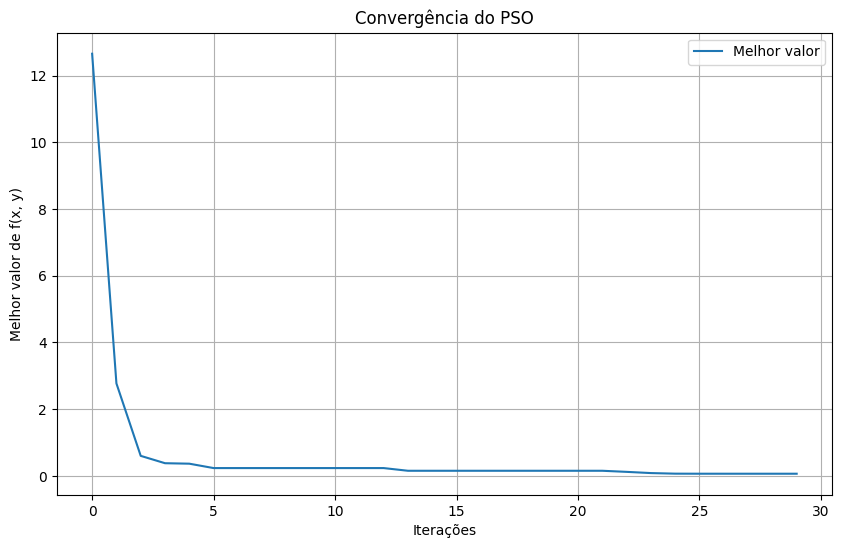

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de Rosenbrock
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Inicializar parâmetros do PSO
def initialize_particles(num_particles, dimensions, lower_bound, upper_bound):
    particles = np.random.uniform(lower_bound, upper_bound, (num_particles, dimensions))
    velocities = np.random.uniform(-abs(upper_bound - lower_bound), abs(upper_bound - lower_bound), (num_particles, dimensions))
    return particles, velocities

def update_velocities(velocities, particles, personal_best_positions, global_best_position, w, c1, c2):
    r1 = np.random.rand(particles.shape[0], particles.shape[1])
    r2 = np.random.rand(particles.shape[0], particles.shape[1])
    
    cognitive_component = c1 * r1 * (personal_best_positions - particles)
    social_component = c2 * r2 * (global_best_position - particles)
    
    new_velocities = w * velocities + cognitive_component + social_component
    return new_velocities

def update_positions(particles, velocities, lower_bound, upper_bound):
    new_particles = particles + velocities
    new_particles = np.clip(new_particles, lower_bound, upper_bound)
    return new_particles

def pso(num_particles, dimensions, lower_bound, upper_bound, maxiter):
    # Initialize particles and velocities
    particles, velocities = initialize_particles(num_particles, dimensions, lower_bound, upper_bound)
    
    personal_best_positions = particles.copy()
    personal_best_scores = np.array([rosenbrock(p) for p in particles])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    
    best_scores = []
    average_scores = []

    w = 0.1  # inertia weight
    c1 = 0.1  # cognitive (particle) weight
    c2 = 0.1  # social (swarm) weight

    for i in range(maxiter):
        for j in range(num_particles):
            score = rosenbrock(particles[j])
            if score < personal_best_scores[j]:
                personal_best_scores[j] = score
                personal_best_positions[j] = particles[j]

        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
        best_scores.append(np.min(personal_best_scores))
        average_scores.append(np.mean(personal_best_scores))
        velocities = update_velocities(velocities, particles, personal_best_positions, global_best_position, w, c1, c2)
        particles = update_positions(particles, velocities, lower_bound, upper_bound)
        
        print(f"Iteração {i+1}/{maxiter}, Melhor Valor: {best_scores[-1]}")
        
    
        
    return global_best_position, best_scores, average_scores

# Definir parâmetros do PSO
num_particles = 100
dimensions = 2
lower_bound = np.array([-5, -5])
upper_bound = np.array([5, 5])
maxiter = 30

# Executar PSO
best_position, best_scores, average_scores = pso(num_particles, dimensions, lower_bound, upper_bound, maxiter)

print(f"Melhor posição: {best_position}")
print(f"Melhor valor: {best_scores[-1]}")

# Plotar a convergência do melhor valor e do valor médio
plt.figure(figsize=(10, 6))
plt.plot(best_scores, label='Melhor valor')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Melhor valor de f(x, y)')
plt.title('Convergência do PSO')
plt.grid(True)
plt.show()


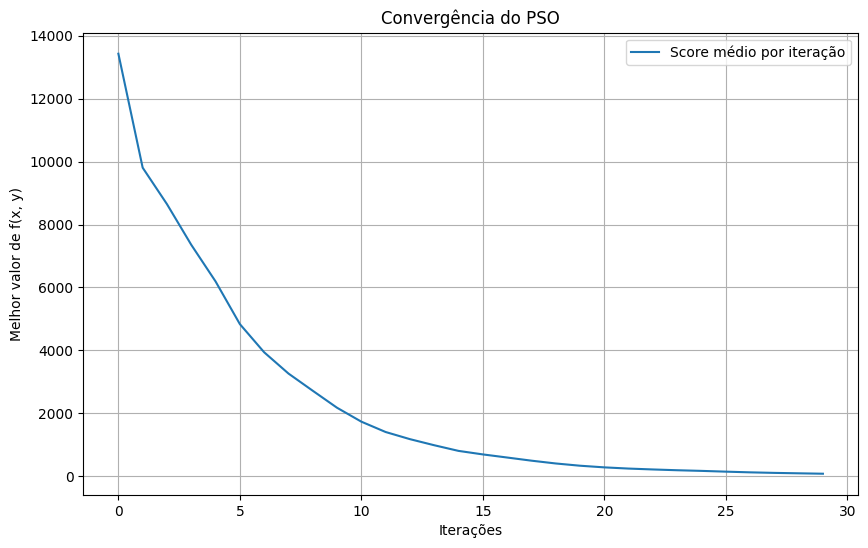

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(average_scores, label='Score médio por iteração')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Melhor valor de f(x, y)')
plt.title('Convergência do PSO')
plt.grid(True)
plt.show()

In [48]:
from genetic_algorithm import GeneticAlgorithm
from chromosome_simple_equation_bound5 import ChoromsomeSimpleEquation


inicial_chromosome_list = [ChoromsomeSimpleEquation(
    # random values between -5 and 5
    x = np.random.uniform(-5,5),
    y = np.random.uniform(-5,5)
) for _ in range(100)]
gen = GeneticAlgorithm(inicial_chromosome_list, threshold=-5, max_generations=30, mutation_chance=0.4, crossover_chance=0.5)
result = gen.runToMinimize()

Generation 0 Best 0.196274194257475 Avg 14013.952658577753
Generation 1 Best 0.053995911984304985 Avg 19187.778459710687
Generation 2 Best 0.053995911984304985 Avg 24163.06345197959
Generation 3 Best 0.053995911984304985 Avg 26658.046844754863
Generation 4 Best 0.053995911984304985 Avg 31952.619774001992
Generation 5 Best 0.053995911984304985 Avg 36576.35747681519
Generation 6 Best 0.053995911984304985 Avg 38452.720969514434
Generation 7 Best 0.053995911984304985 Avg 41378.942982472625
Generation 8 Best 0.053995911984304985 Avg 42039.25203831997
Generation 9 Best 0.053995911984304985 Avg 40627.764874554516
Generation 10 Best 0.053995911984304985 Avg 42815.359725593895
Generation 11 Best 0.053995911984304985 Avg 40603.97864595147
Generation 12 Best 0.053995911984304985 Avg 36187.310649657506
Generation 13 Best 0.053995911984304985 Avg 35137.77674428297
Generation 14 Best 0.053995911984304985 Avg 36852.74076357263
Generation 15 Best 0.053995911984304985 Avg 29111.362721601956
Generation 

In [57]:
# PLOT IT
result[1]


[0.196274194257475,
 0.196274194257475,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985,
 0.053995911984304985]

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(best_scores, label='Melhor valor')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Melhor valor de f(x, y)')
plt.title('Convergência do PSO')
plt.grid(True)
plt.show()